In [7]:
import numpy as np
import pandas as pd
import gymnasium as gym
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Custom modules
from discretizer import GridSpace
from agent_cont import QAgent 


SEED = 42

np.random.seed(SEED)

In [8]:
# env = gym.make('CartPole-v1')
env = gym.make('Pendulum-v1')


action_gridspace = GridSpace(
    bounds = np.array([ [-2., 2.] ]),
    n_tiles = 50,
    single_idx = False
)
state_gridspace = GridSpace(
    bounds = np.array([ [-1., 1.], [-1., 1.], [-8., 8.] ]),
    n_tiles = 50,
    single_idx = False
)

agent = QAgent(
    env=env,
    discount_factor=0.999,
    initial_epsilon=1.0,
    epsilon_decay=0.998,
    min_epsilon=0.0,
    learning_rate=0.99,
    seed=SEED,
    action_gridspace = action_gridspace,
    state_gridspace = state_gridspace
)

In [9]:
rewards = agent.learn(100, 1e2)

Episodes:   0%|          | 0/100 [00:00<?, ?it/s]

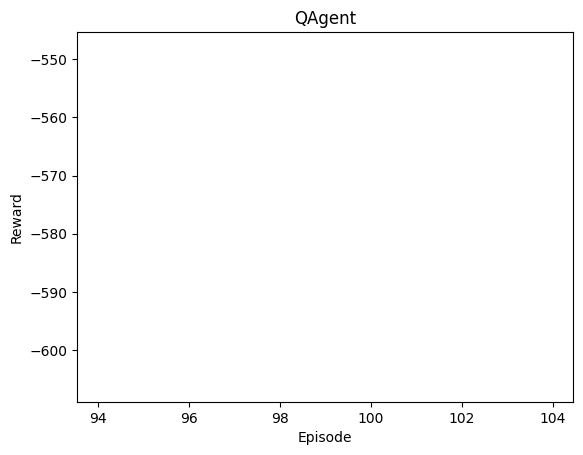

In [10]:
rewards_train = pd.Series(rewards)
fig, ax = plt.subplots()
ax.plot(rewards_train.rolling(100).mean())
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.set_title(agent.__class__.__name__)
plt.show()

In [ ]:
rewards_play = agent.play(1, horizon=1e2, render = False)

print(f'Average reward: {np.mean(rewards_play):2f}')
print(f'Std reward: {np.std(rewards_play):.2f}')

  0%|          | 0/1 [00:00<?, ?it/s]

Average reward: -791.870070
Std reward: 0.00


In [12]:
env.close()

In [13]:
any(rewards_train > 0)

False